In [ ]:
from sklearn.datasets import load_boston
#X, y = load_boston(return_X_y=True)
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:

import pandas as pd
import numpy as np


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

ValueError: ignored

In [ ]:
features=boston_dataset.feature_names
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
pd.DataFrame(X,columns = features)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
from numba import jit

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
def plot_history(history):
  print("nb d'epoch enregistrés :",len(history.history['mse']))
# list all data in history
  #print(history.history.keys())
  # summarize history for accuracy
  plt.figure(figsize=(20,6))
  plt.subplot(122)
  #plt.vlines(x = len(history.history['accuracy']))

  plt.plot(history.history['mse'])
  plt.plot(history.history['val_mse'])
  plt.title('model mse')
  #plt.ylim(0, 1)
  plt.ylabel('mse')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  # summarize history for loss
  plt.subplot(121)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
# define base model
def baseline_model():
	# create model
	model = tf.keras.Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
# X_train , y_train_cat
input_shape = (13)
def initialize_model():
  model =  tf.keras.Sequential([
                             tf.keras.Input(shape=input_shape), 
                             layers.Dense(32,
                                          #kernel_regularizer=tf.keras.regularizers.l1(0.001),
                                          #bias_regularizer=tf.keras.regularizers.l2(1e-4),
                                          #activity_regularizer=tf.keras.regularizers.l2(1e-5),
                                          activation="relu"),       

                             layers.Dense(16,
                                          #kernel_regularizer=tf.keras.regularizers.l1(0.001),
                                          #bias_regularizer=tf.keras.regularizers.l2(1e-4),
                                          #activity_regularizer=tf.keras.regularizers.l2(1e-5),
                                          activation="relu"),
                              layers.Dropout(0.5),
                             layers.Dense(1,)
                             ])    
    ### Model compilation
  model.compile(
      loss='mean_squared_error',
      optimizer="adam",
      metrics=["mse"])
  return model

In [ ]:
model = initialize_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                448       
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=100,
                                            restore_best_weights=True
                                            )



history = model.fit(X_train, y_train,
          batch_size=16,
          epochs=10000,
          validation_split=0.2,
          callbacks=[callback]
          )

Epoch 1/10000
23/23 [==============================] - 1s 10ms/step - loss: 37173.2656 - mse: 37173.2656 - val_loss: 1460.1334 - val_mse: 1460.1334
Epoch 2/10000
23/23 [==============================] - 0s 3ms/step - loss: 17615.7344 - mse: 17615.7344 - val_loss: 707.6991 - val_mse: 707.6991
Epoch 3/10000
23/23 [==============================] - 0s 3ms/step - loss: 7467.2856 - mse: 7467.2856 - val_loss: 478.1243 - val_mse: 478.1243
Epoch 4/10000
23/23 [==============================] - 0s 3ms/step - loss: 4892.2217 - mse: 4892.2217 - val_loss: 334.2678 - val_mse: 334.2678
Epoch 5/10000
23/23 [==============================] - 0s 3ms/step - loss: 2354.5244 - mse: 2354.5244 - val_loss: 208.2650 - val_mse: 208.2650
Epoch 6/10000
23/23 [==============================] - 0s 3ms/step - loss: 1415.8903 - mse: 1415.8903 - val_loss: 169.4312 - val_mse: 169.4312
Epoch 7/10000
23/23 [==============================] - 0s 4ms/step - loss: 775.5152 - mse: 775.5152 - val_loss: 153.5727 - val_mse: 153

In [ ]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

nb d'epoch enregistrés : 1593


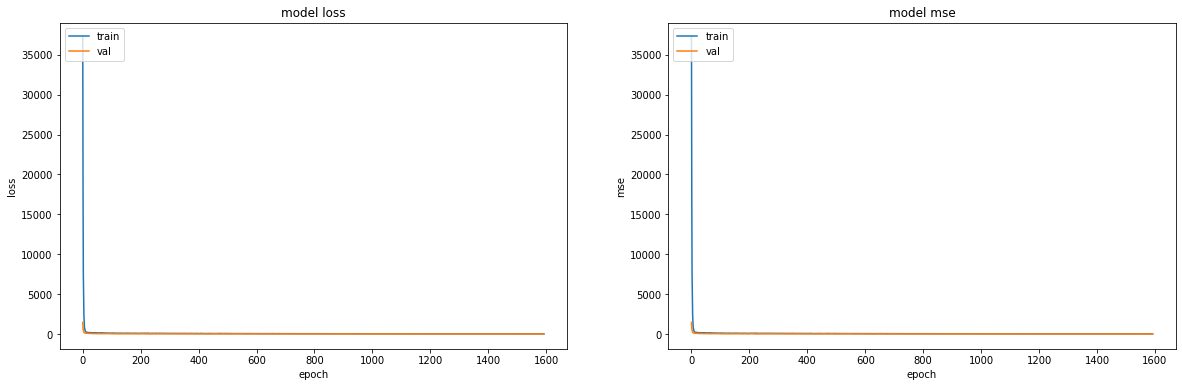

In [ ]:
plot_history(history)

In [ ]:
model.evaluate(X_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - mse: 0.0000e+00


[0.0, 0.0]

In [ ]:
np.mean(model.predict(X_test)-y_test.reshape(-1,1))


0.2880181219063553

In [ ]:

ax.plot(trX, model.predict(X_test), color="red")